In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import sys
import os
dir_current = globals()['_dh'][0]
dir_repo = dir_current+'/../..'
dir_BinnedFit = dir_repo+"/BinnedFit"
dir_KLens = dir_repo+"/KLens"
dir_TNGcube = dir_repo+"/TNGcube"

sys.path.append(dir_KLens)
from KLtool import *

sys.path.append(dir_TNGcube)
from TNGcube import *

lineLambda0 = {'OIIa': 372.7092, 'OIIb': 372.9875, \
               'OIIIa': 496.0295, 'OIIIb': 500.8240, \
               'Halpha': 656.461 }

Populating the interactive namespace from numpy and matplotlib


In [2]:
subhaloInfo = pickle.load(open('../notebooks/cutout_46.pkl', 'rb'))

pars = {}
pars['spinR'] = [0, 0, -1]
pars['sini'] = 1.0
pars['theta_int'] = 0. #np.pi/6.
pars['g1'] = 0.
pars['g2'] = 0.
pars['redshift'] = 0.35
pars['psfFWHM'] = 0.5
pars['slitAngles'] = [0., np.pi/2]

line_species = 'Halpha'

pars['lambda_cen'] = (1+pars['redshift'])*lineLambda0[line_species]

In [3]:
Cube = TNGcube(pars=pars, subhaloInfo=subhaloInfo)

In [4]:
R_spin = Cube.spin_rotation(spin0=subhaloInfo['spin'], spinR=pars['spinR'])
R_sini = Cube.sini_rotation(sini=pars['sini'])
R_pa = Cube.PA_rotation(theta_int = pars['theta_int'])

Rtot = R_pa@R_sini@R_spin

subhaloInfoR = Cube.subhalo_rotation(R=Rtot, subhaloInfo0=subhaloInfo)
subhaloInfoL = Cube.add_shear(g1=pars['g1'], g2=pars['g2'], subhaloInfoR=subhaloInfoR)

In [5]:
massCube = Cube.gen_massCube(ptlTypes=['gas','stars'], lineTypes=Cube.line_species, subhaloInfoL=subhaloInfoL)
#massCube = Cube.gen_massCube(ptlTypes=['stars'], lineTypes=Cube.line_species, subhaloInfoL=subhaloInfoL)

photonCube = Cube.mass_to_light(massCube)
photonCube = Cube.add_psf(photonCube)
spectra = Cube.spec2D(photonCube)

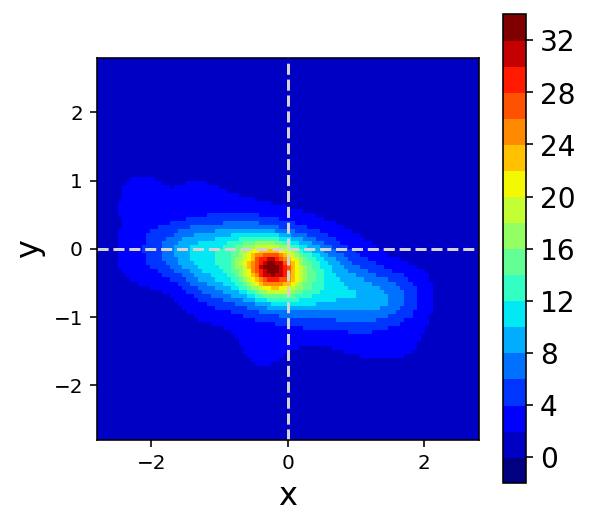

In [6]:
plot_image( np.sum(photonCube, axis=2), spaceGrid=Cube.spaceGrid, xlim=[-2.8, 2.8])

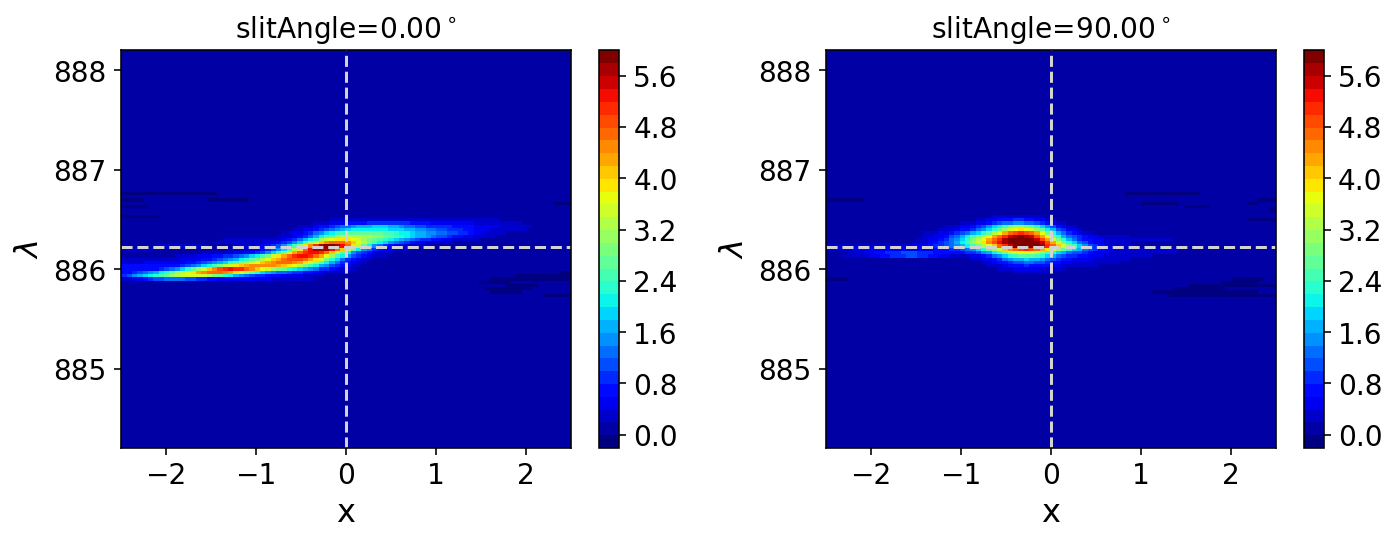

In [7]:
plot_specs(spectra, slitAngles=Cube.Pars.fid['slitAngles'], spaceGrid=Cube.spaceGrid, lambdaGrid=Cube.lambdaGrid, xlim=[-2.5, 2.5])